In [2]:
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import root_scalar

warnings.filterwarnings('ignore')

# Definicje funkcji

In [3]:
#metoda eulera
def euler(f, y0, t, params=None):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t)-1):
        y[i+1] = y[i] + f(y[i],t[i], *(params or []))*(t[i+1]-t[i])
    return y

#metoda rutty-kutty'ego 2 rzędu
def rk2(f, y0, t, params=None):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(len(t) - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *(params or []))
        k2 = f(y[i] + k1*h/2, t[i] + h/2, *(params or []))
        y[i+1] = y[i] + k2 * h
    return y

#metoda rutty-kutty'ego 4 rzędu
def rk4(f, y0, t, params=None):
    if np.isscalar(y0):
        y0 = np.array([y0])
    
    y = np.zeros((len(t), len(y0)))
    y[0] = y0  
    
    if params is None:
        params = ()

    for i in range(len(t) - 1):
        h = t[i + 1] - t[i]  
        
        k1 = f(y[i], t[i],  *params) * h
        k2 = f(y[i] + k1 / 2, t[i] + h / 2,  *params) * h
        k3 = f(y[i] + k2 / 2, t[i] + h / 2, *params) * h
        k4 = f(y[i] + k3, t[i] + h, *params) * h
        
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return y

# Zadanie 1

In [4]:
# Równanie różniczkowe
def f1(y, t):
    return t**2 - 4*y

# Rozwiązanie analityczne
def analytical_solution(x):
    return 1/32 * (8*x**2 - 4*x + 31*np.exp(-4*x) + 1)

In [ ]:
x_1 = np.linspace(0, 0.03, 2) 
x_2 = np.linspace(0, 0.03, 3) 
x_4 = np.linspace(0, 0.03, 5) 
y0 = 1

In [23]:
y_euler_1 = euler(f1, y0, x_1)
y_rk2_1 = rk2(f1, y0, x_1)
y_rk4_1 = rk4(f1, y0, x_1)
y_analytical_1 = analytical_solution(x_1)

y_euler_2 = euler(f1, y0, x_2)
y_rk2_2 = rk2(f1, y0, x_2)
y_rk4_2 = rk4(f1, y0, x_2)
y_analytical_2 = analytical_solution(x_2)

y_euler_3 = euler(f1, y0, x_4)
y_rk2_3 = rk2(f1, y0, x_4)
y_rk4_3 = rk4(f1, y0, x_4)
y_analytical_3 = analytical_solution(x_4)

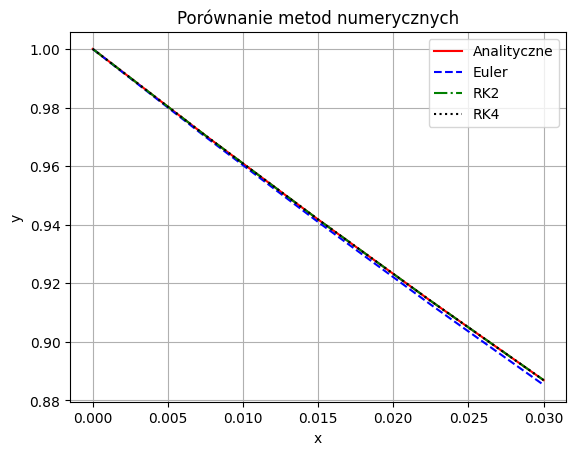

In [7]:
plt.plot(x, y_analytical, 'r-', label='Analityczne')
plt.plot(x, y_euler, 'b--', label='Euler')
plt.plot(x, y_rk2, 'g-.', label='RK2')
plt.plot(x, y_rk4, 'k:', label='RK4')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Porównanie metod numerycznych")
plt.grid()
plt.show()

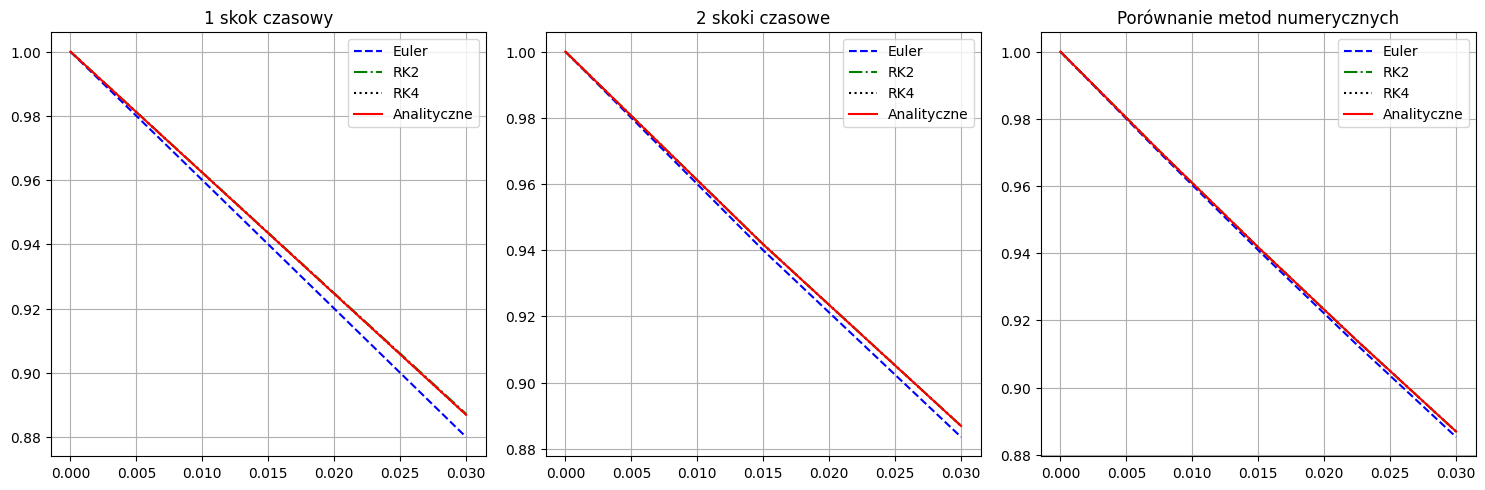

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 wiersz, 3 kolumny

axes[0].plot(x_1, y_euler_1,'b--', label='Euler')
axes[0].plot(x_1, y_rk2_1,'g-.', label='RK2')
axes[0].plot(x_1, y_rk4_1,'k:', label='RK4')
axes[0].plot(x_1, y_analytical_1, 'r-', label='Analityczne')
axes[0].legend()
axes[0].grid()

axes[1].plot(x_2, y_euler_2,'b--', label='Euler')
axes[1].plot(x_2, y_rk2_2,'g-.', label='RK2')
axes[1].plot(x_2, y_rk4_2,'k:', label='RK4')
axes[1].plot(x_2, y_analytical_2, 'r-', label='Analityczne')
axes[1].legend()
axes[1].grid()

axes[2].plot(x_4, y_euler_3,'b--', label='Euler')
axes[2].plot(x_4, y_rk2_3,'g-.', label='RK2')
axes[2].plot(x_4, y_rk4_3,'k:', label='RK4')
axes[2].plot(x_4, y_analytical_3, 'r-', label='Analityczne')
axes[2].legend()
axes[2].grid()

axes[0].set_title("1 skok czasowy") 
axes[1].set_title("2 skoki czasowe") 
axes[2].set_title("4 skoki czasowe") 

plt.tight_layout()
plt.title("Porównanie metod numerycznych")

plt.show()

## zad 2

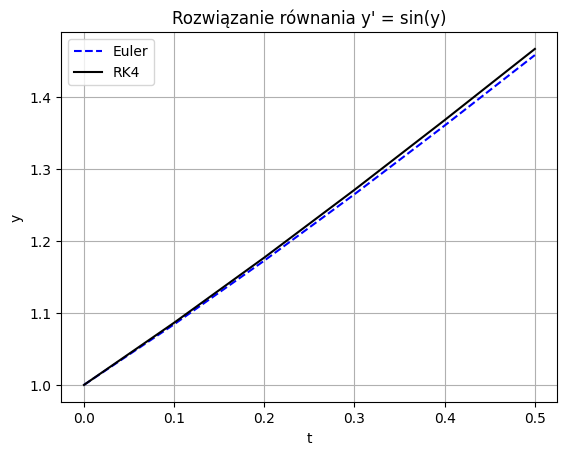

In [30]:
def f(y,t):
    return np.sin(y)

h = 0.1
t = np.arange(0, 0.5 + h, h)
y0 = 1

y_euler = euler(f, y0, t)
y_rk4 = rk4(f, y0, t)

plt.plot(t, y_euler, 'b--', label='Euler')
plt.plot(t, y_rk4, 'k-', label='RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Rozwiązanie równania y' = sin(y)")
plt.legend()
plt.grid()
plt.show()


## zad 3

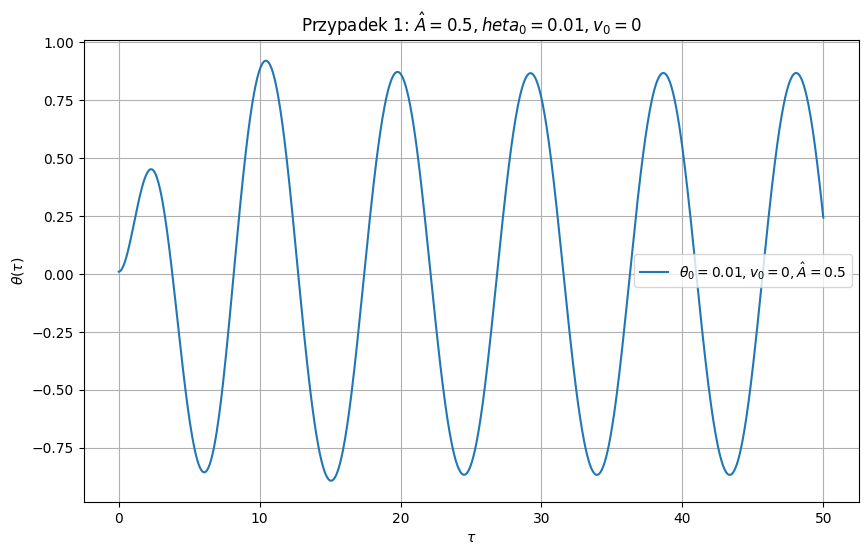

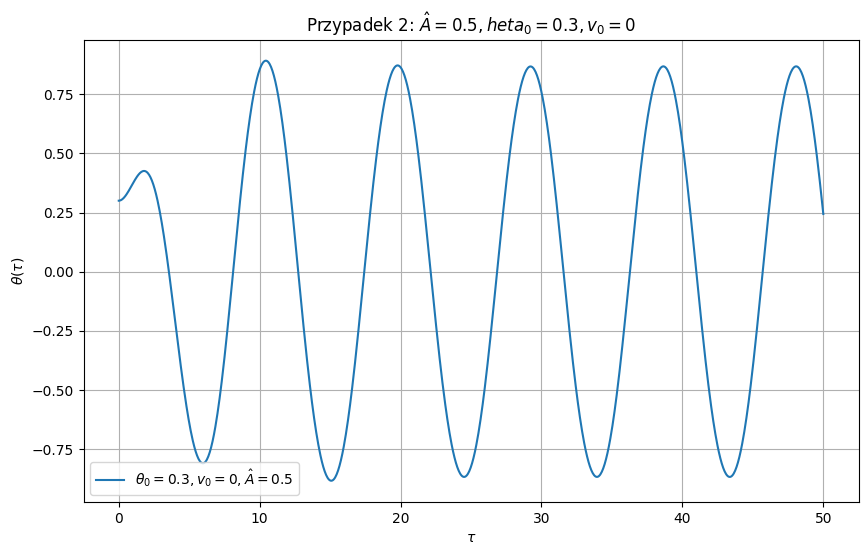

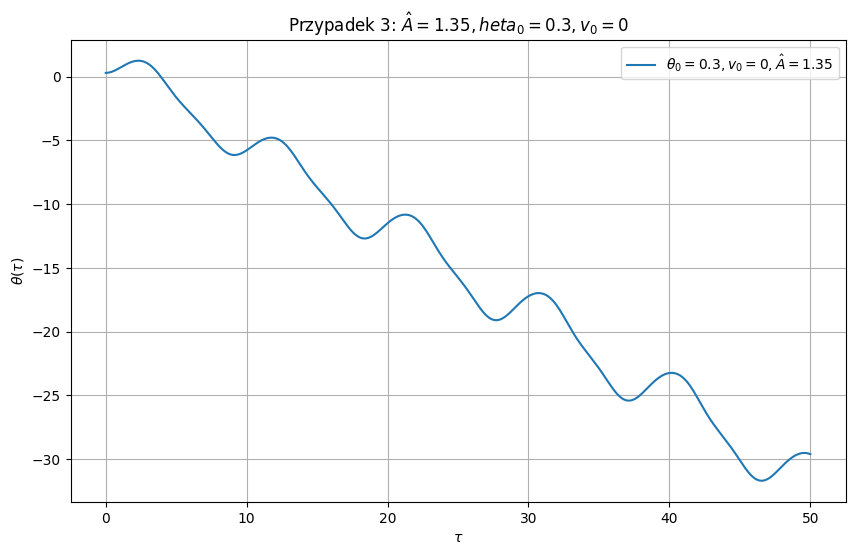

In [32]:
def pendulum(y, t, Q, A_hat, omega_hat):
    theta, v = y  # y[0] = theta, y[1] = v
    dtheta_dt = v
    dv_dt = -1/Q * v - np.sin(theta) + A_hat * np.cos(omega_hat * t)
    return np.array([dtheta_dt, dv_dt])

Q = 2
omega_hat = 2/3
t = np.linspace(0, 50, 1000)  

cases = [
    {"A_hat": 0.5, "theta0": 0.01, "v0": 0},
    {"A_hat": 0.5, "theta0": 0.3, "v0": 0},
    {"A_hat": 1.35, "theta0": 0.3, "v0": 0},
]

for idx, case in enumerate(cases, start=1):
    A_hat = case["A_hat"]
    theta0 = case["theta0"]
    v0 = case["v0"]

    result = rk4(pendulum, [theta0, v0], t, (Q, A_hat, omega_hat))
    theta, velocity = result[:, 0], result[:, 1]

    plt.figure(figsize=(10, 6))
    plt.plot(t, theta, label=fr"$\theta_0={theta0}, v_0={v0}, \hat{{A}}={A_hat}$")
    plt.xlabel(r"$\tau$")
    plt.ylabel(r"$\theta(\tau)$")
    plt.title(f"Przypadek {idx}: $\hat{{A}}={A_hat}, \theta_0={theta0}, v_0={v0}$")
    plt.legend()
    plt.grid()
    plt.show()


## zad 4

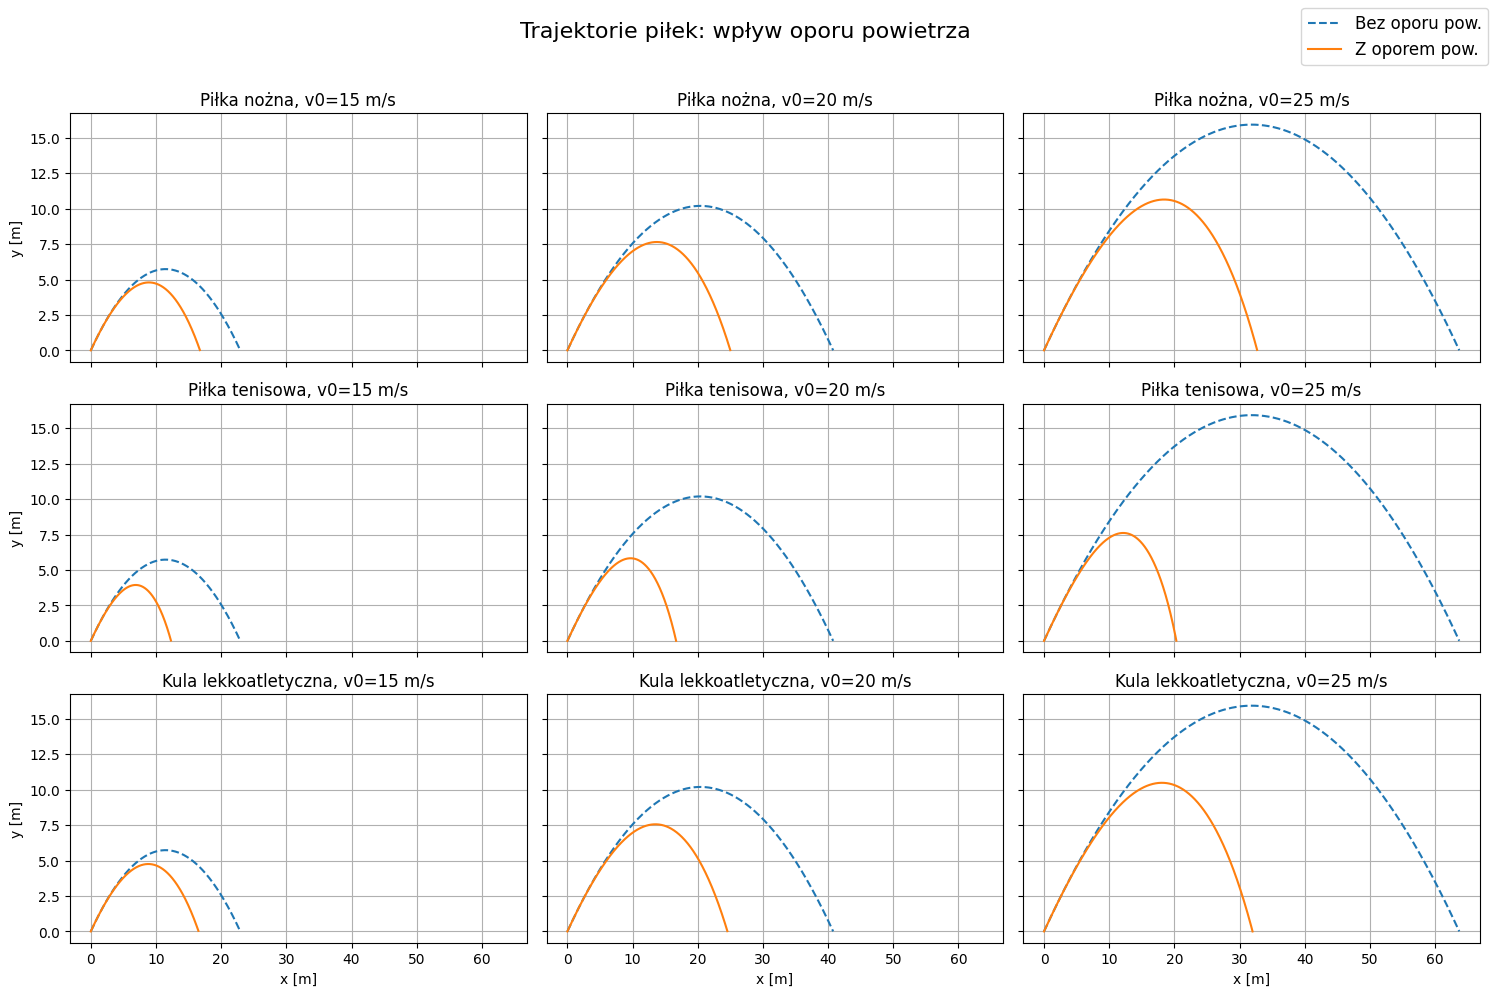

In [10]:
# Parametry stałe
g = 9.81  # Przyspieszenie ziemskie [m/s^2]
cw = 0.35  # Współczynnik oporu powietrza
rho = 1.2  # Gęstość powietrza [kg/m^3]

# Funkcja do obliczenia trajektorii bez oporu powietrza
def no_drag(v0, alpha, g, t):
    x = v0 * np.cos(alpha) * t
    y = v0 * np.sin(alpha) * t - 0.5 * g * t**2
    return x, y

# Funkcja do obliczenia trajektorii z oporem powietrza
def with_drag(y, t, cw, rho, A, m, g):
    vx, vy, x, y_pos = y  # Rozpakowanie wszystkich czterech komponentów
    v = np.sqrt(vx**2 + vy**2)  # Moduł prędkości
    ax = -0.5 * cw * rho * A * v * vx / m  # Przyspieszenie w kierunku x
    ay = -g - 0.5 * cw * rho * A * v * vy / m  # Przyspieszenie w kierunku y
    return np.array([ax, ay, vx, vy])  # Zwracamy przyspieszenia oraz prędkości

# Parametry piłek, prędkości początkowych i kątów rzutu
balls = [
    {"A": 0.045, "m": 0.43, "name": "Piłka nożna"},  # Piłka nożna
    {"A": 0.038, "m": 0.145, "name": "Piłka tenisowa"}, # Piłka tenisowa
    {"A": 0.11, "m": 1.0, "name": "Kula lekkoatletyczna"} # Kula lekkoatletyczna
]
v0_values = [15, 20, 25]  # Prędkości początkowe [m/s]
angles = [30, 45, 60]  # Kąty rzutu [stopnie]

# Czas symulacji
t = np.linspace(0, 5, 1000)

# Obliczenia i wykresy
fig, axs = plt.subplots(len(balls), len(v0_values), figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Trajektorie piłek: wpływ oporu powietrza", fontsize=16)

for i, ball in enumerate(balls):
    A = ball["A"]
    m = ball["m"]
    ball_name = ball["name"]

    for j, v0 in enumerate(v0_values):
        alpha = np.radians(45)  # Stały kąt rzutu 45° dla uproszczenia

        # Bez oporu powietrza
        x_no_drag, y_no_drag = no_drag(v0, alpha, g, t)

        # Z oporem powietrza
        y0_drag = [v0 * np.cos(alpha), v0 * np.sin(alpha), 0, 0]
        params = (cw, rho, A, m, g)
        result_drag = rk4(with_drag, y0_drag, t, params)
        x_drag, y_drag = result_drag[:, 2], result_drag[:, 3]

        # Usuwanie punktów poniżej powierzchni Ziemi
        y_no_drag[y_no_drag < 0] = np.nan
        y_drag[y_drag < 0] = np.nan

        # Wykresy
        axs[i, j].plot(x_no_drag, y_no_drag, label="Bez oporu pow.", linestyle="--")
        axs[i, j].plot(x_drag, y_drag, label="Z oporem pow.", linestyle="-")
        axs[i, j].set_title(f"{ball_name}, v0={v0} m/s")
        axs[i, j].grid()

        if i == len(balls) - 1:
            axs[i, j].set_xlabel("x [m]")
        if j == 0:
            axs[i, j].set_ylabel("y [m]")

# Dodanie legendy
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## zad 5

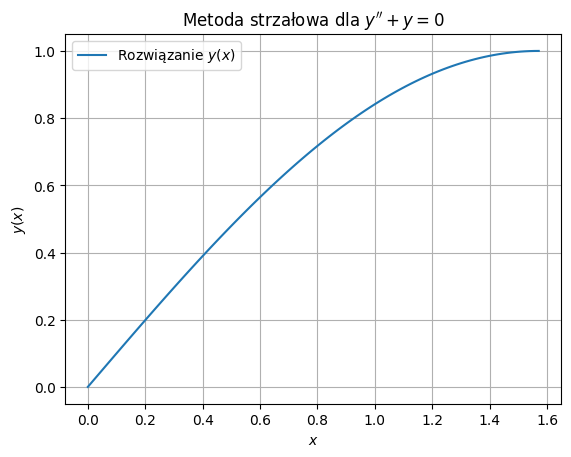

In [11]:
def shooting_method(f, g, x, target, y0_guess, tol=1e-6, max_iter=50):
    """
    Implementacja metody strzałowej do rozwiązania zagadnienia brzegowego.
    f: funkcja układu równań różniczkowych
    g: funkcja sprawdzająca warunek brzegowy
    x: wektor wartości x (czas/przestrzeń)
    target: wartość brzegowa na końcu przedziału
    y0_guess: początkowe zgadywane wartości y'(0)
    tol: tolerancja
    max_iter: maksymalna liczba iteracji
    """
    a, b = y0_guess  # Zakres zgadywania
    for i in range(max_iter):
        u_a = rk4(f, [0, a], x)
        u_b = rk4(f, [0, b], x)
        
        fa = g(u_a[-1, 0], target)
        fb = g(u_b[-1, 0], target)
        
        if fa * fb > 0:
            raise ValueError("Nie znaleziono zmiany znaku w podanym przedziale.")
        
        c = (a + b) / 2
        u_c = rk4(f, [0, c], x)
        fc = g(u_c[-1, 0], target)
        
        if abs(fc) < tol:
            return c, u_c
        
        if fa * fc < 0:
            b = c
        else:
            a = c
    
    raise ValueError("Nie osiągnięto zbieżności.")

# Definicja układu równań różniczkowych
def f(u, t):
    u1, u2 = u
    return np.array([u2, -u1])

# Funkcja sprawdzająca warunek brzegowy
def boundary_condition(y_end, target):
    return y_end - target

# Parametry zadania
x = np.linspace(0, np.pi / 2, 100)
target = 1  # Warunek brzegowy y(π/2) = 1
y0_guess = [0, 10]  # Przedział zgadywania dla y'(0)

# Znajdowanie rozwiązania
y0_opt, solution = shooting_method(f, boundary_condition, x, target, y0_guess)

# Wizualizacja
plt.plot(x, solution[:, 0], label="Rozwiązanie $y(x)$")
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.title("Metoda strzałowa dla $y'' + y = 0$")
plt.legend()
plt.grid()
plt.show()